In [1]:
%pylab inline
from app.analysis import Quote
quote = Quote(Quote.screen_funds('Industries', max_expense=.8), 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-01-29 to 2019-07-29 - 73


In [2]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

64


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
SOXX,122,0.198572,0.701333,0.271819,30.283746,18.160323
SMH,122,0.192390,0.677287,0.272341,29.226176,17.959863
XLK,122,0.190360,0.433902,0.420426,29.136372,10.458927
FTEC,122,0.184279,0.438943,0.401744,28.231842,10.713721
VGT,122,0.184243,0.437667,0.402831,28.323097,10.655620
GDX,122,0.179017,0.785535,0.217789,26.399642,13.655824
IYW,122,0.169022,0.454639,0.354314,27.159518,12.910769
IXN,122,0.166338,0.420657,0.376558,24.919743,9.897506
QTEC,122,0.162085,0.526585,0.292733,24.737087,14.588686


evicted MLPX 0.872 0.124
evicted FXU 0.796 0.023
evicted IYJ 0.898 -0.054
evicted XLB 0.774 0.132
evicted GUNR 0.769 0.116
evicted CIBR 0.841 -0.107
evicted ARKK 0.802 0.036
evicted IYW 0.844 -0.070
evicted BOTZ 0.809 -0.001
evicted KRE 0.888 -0.240
evicted IGF 0.673 0.238
evicted XBI 0.682 0.067
evicted IYG 0.697 -0.213
evicted PHO 0.724 0.115
evicted MLPA 0.325 0.097
evicted ITB 0.562 0.001
evicted IYC 0.783 -0.097
evicted IHI 0.410 0.239
evicted SMH 0.536 -0.143
evicted XLC 0.391 -0.149
evicted IDU 0.576 0.217
retry backlogs ['VGT', 'VPU', 'VAW', 'FNCL', 'XLU', 'XLF', 'VFH', 'IYH', 'VHT', 'IGM', 'FHLC', 'IYF', 'FTEC', 'XLV', 'VIS', 'XLI', 'QTEC', 'VCR', 'SOXX', 'KBE', 'FXH', 'GNR', 'IGV', 'XLP', 'IXN', 'XLK', 'IXJ', 'FXO', 'FXL', 'FDN', 'SKYY', 'ITA', 'XLY', 'XT', 'TDIV', 'HACK', 'RYT', 'XAR', 'GDXJ', 'VOX'] at 0.905/-0.51 - 0.53
evicted XLI 0.870 -0.045
evicted HACK 0.855 -0.133
evicted VAW 0.836 0.101
evicted GNR 0.855 0.061
evicted XT 0.884 0.100
evicted KBE 0.864 -0.235
evicted 

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.141841,0.245800,-0.416997,0.021066,0.148572,0.252950,1.075003,0.544770,20.723258,2.807072
PPA,122.0,0.155696,0.333431,-0.658524,-0.095711,0.129052,0.401568,1.066702,0.443149,22.061107,4.538465
XLP,122.0,0.116796,0.260895,-0.745403,-0.061563,0.126872,0.262641,1.062333,0.417252,17.677811,4.021399
GDX,122.0,0.179017,0.785535,-1.296176,-0.345063,0.081268,0.642457,2.232475,0.217789,26.399642,13.655824


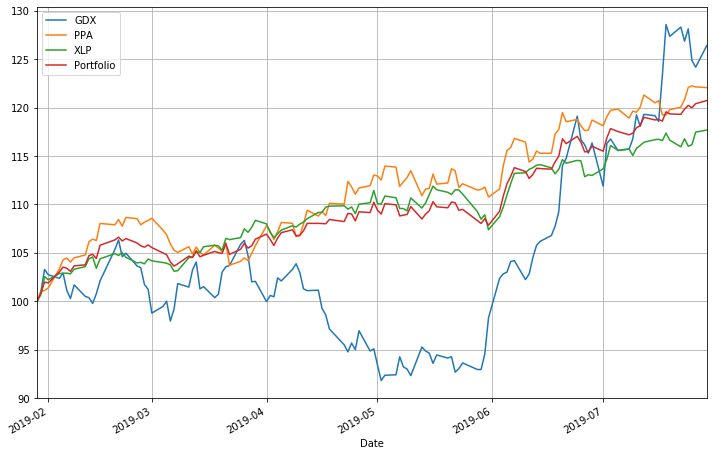

In [3]:
bounds = .12, .16
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=1, bounds=bounds)
quote.setup_mask(['PPA', 'XLP', 'GDX'])
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)